In [1]:
!apt-get install inxi -y -qq &> /dev/null

In [2]:
!inxi -F

System:    Host: dbcb40890e81 Kernel: 5.4.144+ x86_64 bits: 64 Console: tty 0
           Distro: Ubuntu 18.04.5 LTS
Machine:   Device: docker Mobo: Google model: Google Compute Engine serial: Board-GoogleCloud-6FD7EB099BF3AEBB0E64F47FB5F90619
           BIOS: Google v: Google date: 01/01/2011
Battery    Using dmidecode: unknown error occurred
CPU:       Single core Intel Xeon (-MT-) cache: 56320 KB
           clock speeds: max: 2199 MHz 1: 2199 MHz 2: 2199 MHz
Graphics:  Card: Failed to Detect Video Card!
           Display Server: X.org 1.20.8 driver: N/A
           tty size: 0x0 Advanced Data: N/A for root out of X
Network:   Card: Red Hat Virtio network device driver: virtio-pci
           IF: N/A state: N/A speed: N/A duplex: N/A mac: N/A
Drives:    HDD Total Size: 91.3GB (53.7% used)
           ID-1: /dev/sda model: PersistentDisk size: 91.3GB
Partition: ID-1: / size: 108G used: 42G (39%) fs: overlay dev: N/A
RAID:      No RAID devices: /proc/mdstat, md_mod kernel module present
S

In [3]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [4]:
supress_wget_output = True;
dropna_after_reading_csv = False;
dropna_after_merging_dfs = True;

In [5]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/99dd0a7d-4908-4e85-9f20-d58c8195260e/download/componentes-curriculares-semi-presenciais.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/d1de5b44-0ae6-4a22-8dac-ae44aa1c3248/download/componentes-curriculares-ead.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/99dd0a7d-4908-4e85-9f20-d58c8195260e/download/componentes-curriculares-semi-presenciais.csv
  !wget -nc https://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/d1de5b44-0ae6-4a22-8dac-ae44aa1c3248/download/componentes-curriculares-ead.csv
  !wget -nc https://dados.ufrn.br/dataset/8bf1a468-48ff-4f4d-95ee-b17b7a3a5592/resource/ff0a457e-76fa-4aca-ad99-48aebd7db070/download/docentes.csv

In [6]:
componentes_curriculares = pd.read_csv('componentes-curriculares-presenciais.csv', sep=';', usecols=["id_componente","codigo","nivel","nome","unidade_responsavel"])
docentes = pd.read_csv('docentes.csv', sep=';')

In [7]:
componentes_curriculares.id_componente = componentes_curriculares.id_componente.astype(str)
componentes_curriculares.dropna(inplace=True)
componentes_curriculares = componentes_curriculares[~componentes_curriculares.id_componente.duplicated()]

In [8]:
class semestre:
  def __init__(self, identificador, csv_turmas, csv_matricula_componente):
    self.identificador = identificador
    self.csv_turmas = csv_turmas
    self.csv_matricula_componente = csv_matricula_componente
    self.rows_dropped = 0
    #self.rows_dropped = 0

In [9]:
semestres = []

In [10]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/3ae16138-4214-4a30-ac2d-6cffd6237031/download/turmas-2018.1.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/3c1feba4-ced1-466e-8e94-a040224a51dc/download/matricula-componente-20181.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/3ae16138-4214-4a30-ac2d-6cffd6237031/download/turmas-2018.1.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/3c1feba4-ced1-466e-8e94-a040224a51dc/download/matricula-componente-20181.csv
csv_turmas_2018_1 = 'turmas-2018.1.csv'
csv_matricula_componente_2018_1 = 'matricula-componente-20181.csv'
semestres.append(semestre('2018.1', csv_turmas_2018_1, csv_matricula_componente_2018_1))

In [11]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/77fe7603-0e71-4e21-8cd4-cb823353023f/download/turmas-2018.2.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/0bfcaf6a-4424-4983-8ba8-d330350a8fbe/download/matricula-componente-20182.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/77fe7603-0e71-4e21-8cd4-cb823353023f/download/turmas-2018.2.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/0bfcaf6a-4424-4983-8ba8-d330350a8fbe/download/matricula-componente-20182.csv
csv_turmas_2018_2 = 'turmas-2018.2.csv'
csv_matricula_componente_2018_2 = 'matricula-componente-20182.csv'
semestres.append(semestre('2018.2', csv_turmas_2018_2, csv_matricula_componente_2018_2))

In [12]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/1e42cd66-69d6-48d5-a346-d46766fd2c9c/download/turmas-2019.1.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/6d66d15a-8d0f-43a3-902b-d314f4a2a296/download/matricula-componente-20191.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/1e42cd66-69d6-48d5-a346-d46766fd2c9c/download/turmas-2019.1.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/6d66d15a-8d0f-43a3-902b-d314f4a2a296/download/matricula-componente-20191.csv
csv_turmas_2019_1 = 'turmas-2019.1.csv'
csv_matricula_componente_2019_1 = 'matricula-componente-20191.csv'
semestres.append(semestre('2019.1', csv_turmas_2019_1, csv_matricula_componente_2019_1))

In [13]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/d9c2863e-d1b2-4afd-b7dd-09517d5ed17d/download/turmas-2019.2.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/0d573a4f-de65-4c3d-b6bb-337473bc4e44/download/matricula-componente-20192.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/d9c2863e-d1b2-4afd-b7dd-09517d5ed17d/download/turmas-2019.2.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/0d573a4f-de65-4c3d-b6bb-337473bc4e44/download/matricula-componente-20192.csv
csv_turmas_2019_2 = 'turmas-2019.2.csv'
csv_matricula_componente_2019_2 = 'matricula-componente-20192.csv'
semestres.append(semestre('2019.2', csv_turmas_2019_2, csv_matricula_componente_2019_2))

In [14]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/3a9fe77e-478d-4b18-b7bc-a4df57cbdf46/download/turmas-2020.1.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4e4dd1fb-fc0b-460d-b52a-9f37a42b82b3/download/matricula-componente-20201.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/3a9fe77e-478d-4b18-b7bc-a4df57cbdf46/download/turmas-2020.1.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4e4dd1fb-fc0b-460d-b52a-9f37a42b82b3/download/matricula-componente-20201.csv
csv_turmas_2020_1 = 'turmas-2020.1.csv'
csv_matricula_componente_2020_1 = 'matricula-componente-20201.csv'
semestres.append(semestre('2020.1', csv_turmas_2020_1, csv_matricula_componente_2020_1))

In [15]:
if supress_wget_output:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/964f91df-f322-4e56-897b-f06cca611904/download/turmas-2020.6.csv &> /dev/null
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9d663129-879a-4663-b631-4bfd0ee08e98/download/matricula-componente-20206.csv &> /dev/null
else:
  !wget -nc https://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/964f91df-f322-4e56-897b-f06cca611904/download/turmas-2020.6.csv
  !wget -nc https://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/9d663129-879a-4663-b631-4bfd0ee08e98/download/matricula-componente-20206.csv
csv_turmas_2020_6 = 'turmas-2020.6.csv'
csv_matricula_componente_2020_6 = 'matricula-componente-20206.csv'
semestres.append(semestre('2020.6', csv_turmas_2020_6, csv_matricula_componente_2020_6))

In [16]:
for semestre in semestres:
  semestre.turmas = pd.read_csv(semestre.csv_turmas, sep=';')
  semestre.matricula_componente = pd.read_csv(semestre.csv_matricula_componente, sep=';')

  if dropna_after_reading_csv:
    aux_1 = semestre.turmas.dropna(axis=0)
    aux_2 = semestre.matricula_componente.dropna(axis=0)
    semestre.rows_dropped += (semestre.turmas.size - aux_1.size) + (semestre.matricula_componente.size - aux_2.size)
    semestre.turmas = aux_1
    semestre.matricula_componente = aux_2

In [17]:
for semestre in semestres:
  print(semestre.identificador + ':')
  print('  rows_dropped: ' + str(semestre.rows_dropped))
  print('  turmas_df_size: ' + str(semestre.turmas.size))
  print('  matricula_componente_df_size: ' + str(semestre.matricula_componente.size))
  print()

2018.1:
  rows_dropped: 0
  turmas_df_size: 388076
  matricula_componente_df_size: 6968180

2018.2:
  rows_dropped: 0
  turmas_df_size: 410826
  matricula_componente_df_size: 6887730

2019.1:
  rows_dropped: 0
  turmas_df_size: 420108
  matricula_componente_df_size: 7536540

2019.2:
  rows_dropped: 0
  turmas_df_size: 394238
  matricula_componente_df_size: 6695520

2020.1:
  rows_dropped: 0
  turmas_df_size: 210938
  matricula_componente_df_size: 1664620

2020.6:
  rows_dropped: 0
  turmas_df_size: 249418
  matricula_componente_df_size: 6153960



In [18]:
colunas_merge = ["id_turma","siape","codigo","nivel_ensino","nome","unidade_responsavel", "situacao_turma","capacidade_aluno","descricao_horario"]

for semestre in semestres:
  aux_1 = semestre.turmas
  aux_1.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
  aux_1.id_componente = aux_1.id_componente.astype(str)
  semestre.turmas = aux_1
  aux_2 = pd.merge(semestre.turmas, componentes_curriculares, on='id_componente')[colunas_merge]
  if dropna_after_merging_dfs:
    aux_2.dropna(axis=0, inplace=True)

  semestre.df = aux_2

In [19]:
 colunas_merge = ["id_turma", "nome_y", "codigo", "nivel_ensino","nome_x","capacidade_aluno", "descricao_horario"]

for semestre in semestres:
  aux_0 = semestre.df
  aux_0 = aux_0[aux_0.situacao_turma == 'CONSOLIDADA']
  aux_0.rename(columns={'siape': 'siape'}, inplace=True)
  aux_1 = pd.merge(aux_0, docentes, on='siape')[colunas_merge]
  aux_2 = semestre.matricula_componente[semestre.matricula_componente.id_turma.isin(aux_1.id_turma)]
  aux_3 = pd.merge(aux_2, aux_1, on='id_turma')
  semestre.df = aux_3

In [20]:
for semestre in semestres:
  aux_1 = semestre.df
  aux_1 = aux_1.replace({',': '.'}, regex=True)
  aux_1.capacidade_aluno = aux_1.capacidade_aluno.astype(np.int64)
  aux_1.nota = aux_1.nota.astype(np.float64)
  aux_1.media_final = aux_1.media_final.astype(np.float64)
  aux_1.id_curso = aux_1.id_curso.fillna(0).astype(np.ushort)
  aux_1.unidade = aux_1.unidade.fillna(0).astype(np.ushort)
  aux_1.faltas_unidade = aux_1.faltas_unidade.fillna(0).astype(np.ushort)
  aux_1.numero_total_faltas = aux_1.numero_total_faltas.fillna(0).astype(np.ushort)
  aux_1.capacidade_aluno = aux_1.capacidade_aluno.fillna(0).astype(np.ushort)
  aux_1.id_turma = aux_1.id_turma.fillna(0).astype(np.ushort)
  semestre.df = aux_1

In [21]:
def aprovado(row):
    if row["descricao"] == "APROVADO" or row["descricao"] == "APROVADO POR NOTA":
        return True
    else:
        return False

In [22]:
def reprovadoporfalta(row):
    if row["descricao"] == "REPROVADO POR FALTAS" or row["descricao"] == "REPROVADO POR NOTA E FALTA" or row["descricao"] == "REPROVADO POR MÉDIA E POR FALTAS":
        return True
    else:
        return False

In [23]:
def reposicao(row):
    if row["reposicao"] == "True":
        return True
    else:
        return False

In [24]:
def matematicamentereprovado(row):
  if row["aprovado"] == 0:
    if row["media_final"] < 5:
      if row["reprovadoporfalta"] == True:
        return True;
        # ele tem que sair
      else:
        return False;
    else:
      return False;
  else:
    return False;

In [25]:
for semestre in semestres:
  aux_1 = semestre.df
  rotulos_1 = aux_1.apply(aprovado, axis = 1)
  aux_1["aprovado"] = rotulos_1
  rotulos_2 = aux_1.apply(reprovadoporfalta, axis = 1)
  aux_1["reprovadoporfalta"] = rotulos_2
  rotulos_3 = aux_1.apply(reposicao, axis = 1)
  aux_1["reposicao"] = rotulos_3
  aux_1['semestre'] = semestre.identificador

In [26]:
dfs = []
for semestre in semestres:
  dfs.append(semestre.df)
df = pd.concat(dfs, ignore_index=True)

In [27]:
df = df.dropna()
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
aux = df
df = aux.rename(columns = {'nome_y' : 'docente', 'nome_x' : 'disciplina'})

In [28]:
df

,id_turma,discente,id_curso,unidade,nota,reposicao,faltas_unidade,media_final,numero_total_faltas,descricao,docente,codigo,nivel_ensino,disciplina,capacidade_aluno,descricao_horario,aprovado,reprovadoporfalta,semestre
0,9902,150f06d25dfafd2ac87b2a49b8fb49b1,33991,1,10.0,False,0,7.7,0,APROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,True,False,2018.1
1,9902,150f06d25dfafd2ac87b2a49b8fb49b1,33991,2,6.0,False,0,7.7,0,APROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,True,False,2018.1
2,9902,150f06d25dfafd2ac87b2a49b8fb49b1,33991,3,7.0,False,0,7.7,0,APROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,True,False,2018.1
3,9902,46f9540cc15333e6ec97dfd8e69120a5,33991,1,0.0,False,0,0.0,0,REPROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
4,9902,46f9540cc15333e6ec97dfd8e69120a5,33991,2,0.0,False,0,0.0,0,REPROVADO,ANDREA CRISTINA SANTOS DE JESUS,CSH8917,GRADUAÇÃO,TEORIA GERAL DA ADMINISTRAÇÃO,60,3N12 6N34,False,False,2018.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982533,51177,38739ed2f2c78b62a97d159296aada97,64347,1,0.0,False,0,0.0,0,REPROVADO,ANDREY PEREIRA DE OLIVEIRA,LET0615,GRADUAÇÃO,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,41,2M3456,False,False,2020.6
1982534,51177,38739ed2f2c78b62a97d159296aada97,64347,2,0.0,False,0,0.0,0,REPROVADO,ANDREY PEREIRA DE OLIVEIRA,LET0615,GRADUAÇÃO,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,41,2M3456,False,False,2020.6
1982535,51177,6ff513d319c0c2f295aee41bc1832627,64347,2,8.5,False,0,8.3,0,APROVADO,ANDREY PEREIRA DE OLIVEIRA,LET0615,GRADUAÇÃO,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,41,2M3456,True,False,2020.6
1982536,51177,6ff513d319c0c2f295aee41bc1832627,64347,3,8.3,False,0,8.3,0,APROVADO,ANDREY PEREIRA DE OLIVEIRA,LET0615,GRADUAÇÃO,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,41,2M3456,True,False,2020.6


In [29]:
dfc = df[['discente', 'unidade', 'nota', 'media_final','aprovado', 'reposicao', 'reprovadoporfalta', 'numero_total_faltas', 'descricao','nivel_ensino', 'id_turma', 'codigo', 'disciplina', 'docente','semestre']]

In [30]:
dfc

,discente,unidade,nota,media_final,aprovado,reposicao,reprovadoporfalta,numero_total_faltas,descricao,nivel_ensino,id_turma,codigo,disciplina,docente,semestre
0,150f06d25dfafd2ac87b2a49b8fb49b1,1,10.0,7.7,True,False,False,0,APROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
1,150f06d25dfafd2ac87b2a49b8fb49b1,2,6.0,7.7,True,False,False,0,APROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
2,150f06d25dfafd2ac87b2a49b8fb49b1,3,7.0,7.7,True,False,False,0,APROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
3,46f9540cc15333e6ec97dfd8e69120a5,1,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
4,46f9540cc15333e6ec97dfd8e69120a5,2,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,9902,CSH8917,TEORIA GERAL DA ADMINISTRAÇÃO,ANDREA CRISTINA SANTOS DE JESUS,2018.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982533,38739ed2f2c78b62a97d159296aada97,1,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,51177,LET0615,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,ANDREY PEREIRA DE OLIVEIRA,2020.6
1982534,38739ed2f2c78b62a97d159296aada97,2,0.0,0.0,False,False,False,0,REPROVADO,GRADUAÇÃO,51177,LET0615,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,ANDREY PEREIRA DE OLIVEIRA,2020.6
1982535,6ff513d319c0c2f295aee41bc1832627,2,8.5,8.3,True,False,False,0,APROVADO,GRADUAÇÃO,51177,LET0615,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,ANDREY PEREIRA DE OLIVEIRA,2020.6
1982536,6ff513d319c0c2f295aee41bc1832627,3,8.3,8.3,True,False,False,0,APROVADO,GRADUAÇÃO,51177,LET0615,LITERATURA BRASILEIRA: DAS ORIGENS AO ROMANTISMO,ANDREY PEREIRA DE OLIVEIRA,2020.6


In [31]:
dfc.descricao.unique()

array(['APROVADO', 'REPROVADO', 'REPROVADO POR NOTA',
       'REPROVADO POR MÉDIA E POR FALTAS', 'APROVADO POR NOTA',
       'CANCELADO', 'REPROVADO POR FALTAS', 'EXCLUIDA',
       'REPROVADO POR NOTA E FALTA', 'TRANCADO', 'DESISTENCIA',
       'DISPENSADO', 'EM ESPERA', 'CUMPRIU', 'AGUARDANDO DEFERIMENTO'],
      dtype=object)

In [32]:
dfc = dfc[dfc["descricao"] != "INDEFERIDO"]
dfc = dfc[dfc["descricao"] != "EXCLUIDA"]
dfc = dfc[dfc["descricao"] != "TRANCADO"]
dfc = dfc[dfc["descricao"] != "CANCELADO"]
dfc = dfc[dfc["descricao"] != "DESISTENCIA"]
dfc = dfc[dfc["descricao"] != "AGUARDANDO DEFERIMENTO"]
dfc = dfc[dfc["descricao"] != "CUMPRIU"]
dfc = dfc[dfc["descricao"] != "EM ESPERA"]
dfc = dfc[dfc["descricao"] != "DISPENSADO"]

In [33]:
dfc = dfc[dfc["nivel_ensino"] == "GRADUAÇÃO"]

In [34]:
dfc.to_csv("dfc.csv")

In [35]:
filtrados = dfc
filtrados = filtrados.loc[filtrados['disciplina'] == 'INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO']
rotulos_filtrados = filtrados.apply(matematicamentereprovado, axis = 1)
filtrados["reprovadomatematicamente"] = rotulos_filtrados

base_final = filtrados.loc[filtrados['reprovadomatematicamente'] == False]

In [36]:
excluidos = filtrados.loc[filtrados['reprovadomatematicamente'] == True]

In [37]:
excluidos

,discente,unidade,nota,media_final,aprovado,reposicao,reprovadoporfalta,numero_total_faltas,descricao,nivel_ensino,id_turma,codigo,disciplina,docente,semestre,reprovadomatematicamente
152557,7448bbfeb9b87ec12bbb49b0c0e87e7d,1,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152558,7448bbfeb9b87ec12bbb49b0c0e87e7d,2,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152559,7448bbfeb9b87ec12bbb49b0c0e87e7d,3,0.0,0.0,False,False,True,55,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152623,22c17fcdde44072a52cbc8add9822411,1,8.9,3.9,False,False,True,48,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
152624,22c17fcdde44072a52cbc8add9822411,2,2.9,3.9,False,False,True,48,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,7902,DIM0118.0,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,RAFAEL BESERRA GOMES,2018.1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733222,70fbf2794c50774bd667207c60e4f71b,2,0.9,0.6,False,False,True,70,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,58432,IMD1012,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,WELLINGTON SILVA DE SOUZA,2020.6,True
1733223,70fbf2794c50774bd667207c60e4f71b,1,0.9,0.6,False,False,True,70,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,58432,IMD1012,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,WELLINGTON SILVA DE SOUZA,2020.6,True
1733236,6043307418e036ae8e52936a7a0f7a68,1,3.9,4.0,False,False,True,32,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,58432,IMD1012,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,WELLINGTON SILVA DE SOUZA,2020.6,True
1733237,6043307418e036ae8e52936a7a0f7a68,3,4.1,4.0,False,False,True,32,REPROVADO POR MÉDIA E POR FALTAS,GRADUAÇÃO,58432,IMD1012,INTRODUÇÃO ÀS TÉCNICAS DE PROGRAMAÇÃO,WELLINGTON SILVA DE SOUZA,2020.6,True


In [38]:
# linhas excluidas pela regra
excluidos.size

5424

In [39]:
# [discente, turma] excluidos pela regra
excluidos[excluidos.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True].size

1696

In [40]:
base_final.to_csv("base_final.csv")

In [41]:
# [discente, turma] na base final
base_final[base_final.duplicated(subset = ["discente", "id_turma"], keep = 'first') != True].size

10048

In [58]:
kmeansdb = base_final
dfkm = kmeansdb[['id_turma','discente', 'docente', 'unidade', 'nota', 'media_final','numero_total_faltas', 'aprovado', 'reposicao', 'reprovadoporfalta', 'semestre']]


def strhash_to_inthash(row):
  strhash = row['discente'];
  return hash(strhash) % 10**8;

def bool_to_int_aprovado(row):
  if row['aprovado'] == True:
    return 1;
  else:
    return 0;

def bool_to_int_reprovadoporfalta(row):
  if row['reprovadoporfalta'] == True:
    return 1;
  else:
    return 0;

def bool_to_int_reposicao(row):
  if row['reposicao'] == True:
    return 1;
  else:
    return 0;

def docentehash(row):
  strhash = row['docente'].split()[0];
  inthash = hash(strhash) % 10**1;
  return inthash;

def docentenome(row):
  return row['docente'].split()[0];
'''
reduced_docente = dfkm.apply(docentenome, axis = 1)
dfkm["docente_nome"] = reduced_docente'''

inthashed_docente = dfkm.apply(docentehash, axis = 1)
dfkm["docente"] = inthashed_docente

inthashed_discente = dfkm.apply(strhash_to_inthash, axis = 1)
dfkm["discente"] = inthashed_discente 

aprovacao = dfkm.apply(bool_to_int_aprovado, axis = 1)
dfkm["aprovado"] = aprovacao 

reprovacaoporfalta = dfkm.apply(bool_to_int_reprovadoporfalta, axis = 1)
dfkm["reprovadoporfalta"] = reprovacaoporfalta 

reposicao = dfkm.apply(bool_to_int_reposicao, axis = 1)
dfkm["reposicao"] = reposicao 

normalized_docente=(dfkm.docente-dfkm.docente.min())/(dfkm.docente.max()-dfkm.docente.min())
dfkm["docente"] = normalized_docente

normalized_discente=(dfkm.discente-dfkm.discente.min())/(dfkm.discente.max()-dfkm.discente.min())
dfkm["discente"] = normalized_discente

normalized_unidade=(dfkm.unidade-dfkm.unidade.min())/(dfkm.unidade.max()-dfkm.unidade.min())
dfkm["unidade"] = normalized_unidade

normalized_nota=(dfkm.nota-dfkm.nota.min())/(dfkm.nota.max()-dfkm.nota.min())
dfkm["nota"] = normalized_nota

normalized_media_final=(dfkm.media_final-dfkm.media_final.min())/(dfkm.media_final.max()-dfkm.media_final.min())
dfkm["media_final"] = normalized_media_final

normalized_numero_total_faltas=(dfkm.numero_total_faltas-dfkm.numero_total_faltas.min())/(dfkm.numero_total_faltas.max()-dfkm.numero_total_faltas.min())
dfkm["numero_total_faltas"] = normalized_numero_total_faltas

#dfkm[dfkm["reprovadoporfalta"] == 1]
#dfkm[dfkm["aprovado"] == 1]
#dfkm[dfkm["media_final"] == 1]
#dfkm[dfkm["nota"] == 1]

In [59]:
dfkm.aprovado = dfkm.aprovado.astype(np.float64)
dfkm.reprovadoporfalta = dfkm.reprovadoporfalta.astype(np.float64)
dfkm.reposicao = dfkm.reposicao.astype(np.float64)

dfkm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1965 entries, 152545 to 1733241
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_turma             1965 non-null   uint16 
 1   discente             1965 non-null   float64
 2   docente              1965 non-null   float64
 3   unidade              1965 non-null   float64
 4   nota                 1965 non-null   float64
 5   media_final          1965 non-null   float64
 6   numero_total_faltas  1965 non-null   float64
 7   aprovado             1965 non-null   float64
 8   reposicao            1965 non-null   float64
 9   reprovadoporfalta    1965 non-null   float64
 10  semestre             1965 non-null   object 
dtypes: float64(9), object(1), uint16(1)
memory usage: 172.7+ KB


In [61]:
dfkm

,id_turma,discente,docente,unidade,nota,media_final,numero_total_faltas,aprovado,reposicao,reprovadoporfalta,semestre
152545,7902,0.490372,1.000000,0.0,0.80,0.77,0.029412,1.0,0.0,0.0,2018.1
152546,7902,0.490372,1.000000,0.5,0.84,0.77,0.029412,1.0,0.0,0.0,2018.1
152547,7902,0.490372,1.000000,1.0,0.66,0.77,0.029412,1.0,0.0,0.0,2018.1
152554,7902,0.508022,1.000000,0.0,0.45,0.64,0.205882,1.0,0.0,0.0,2018.1
152555,7902,0.508022,1.000000,0.5,0.76,0.64,0.205882,1.0,0.0,0.0,2018.1
...,...,...,...,...,...,...,...,...,...,...,...
1733234,58432,0.853048,0.777778,0.5,0.30,0.44,0.294118,0.0,0.0,0.0,2020.6
1733235,58432,0.853048,0.777778,1.0,0.72,0.44,0.294118,0.0,0.0,0.0,2020.6
1733239,58432,0.353856,0.777778,0.5,0.50,0.57,0.147059,1.0,0.0,0.0,2020.6
1733240,58432,0.353856,0.777778,0.0,0.50,0.57,0.147059,1.0,0.0,0.0,2020.6


In [62]:
describedb = dfkm
describedb = dfkm[['nota', 'media_final', 'numero_total_faltas', 'aprovado']]
describedb.describe()

,nota,media_final,numero_total_faltas,aprovado
count,1965.000000,1965.000000,1965.000000,1965.000000
mean,0.591318,0.608412,0.142232,0.746565
std,0.315708,0.258489,0.143274,0.435089
min,0.000000,0.000000,0.000000,0.000000
25%,0.370000,0.500000,0.000000,0.000000
50%,0.640000,0.640000,0.117647,1.000000
75%,0.860000,0.790000,0.264706,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [63]:
dfkm.to_csv("dfkm.csv")

In [64]:
dfkm20201 = dfkm.loc[dfkm['semestre'] == '2020.6']

In [65]:
dfkmnot20201 = dfkm.loc[dfkm['semestre'] != '2020.6']

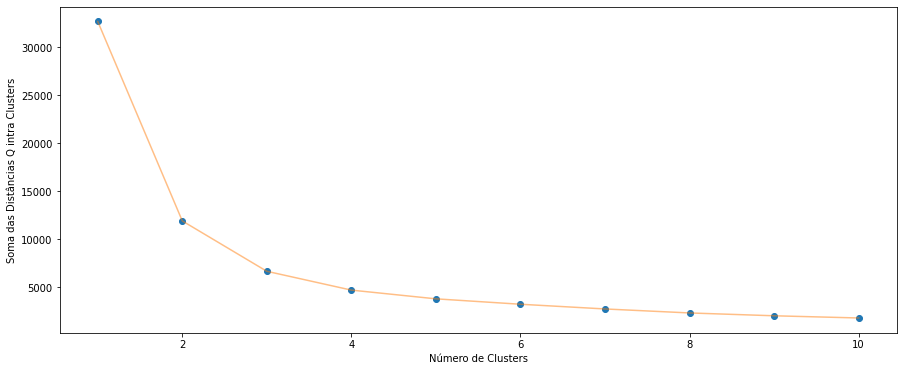

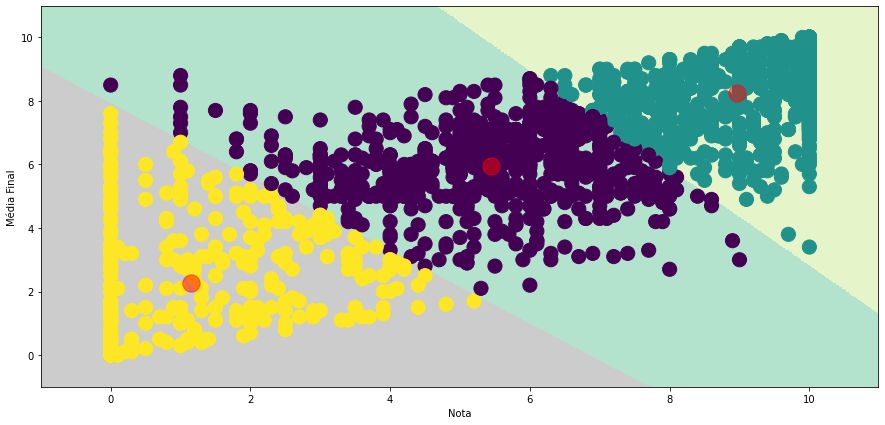

In [66]:
X2 = base_final[['nota','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'nota' ,y = 'media_final' , data = base_final , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Nota')
plt.show()

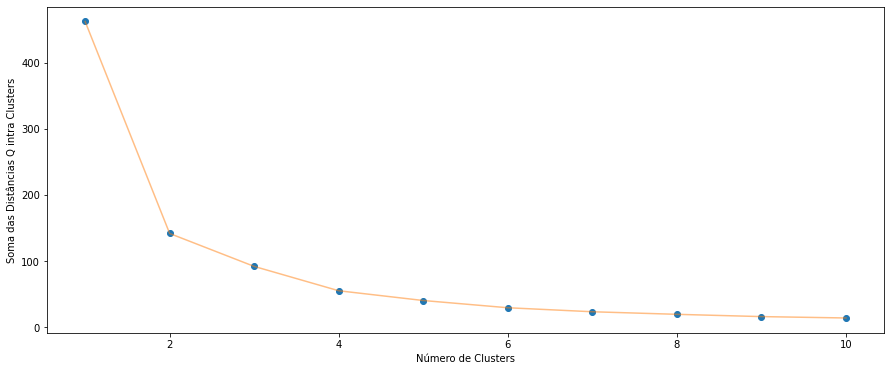

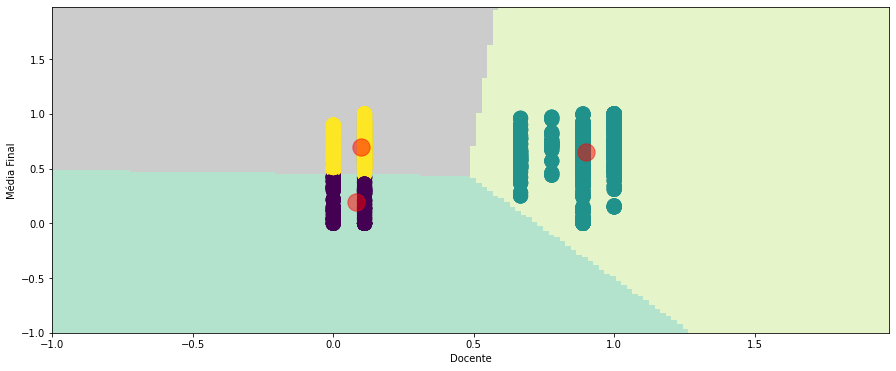

In [67]:
X2 = dfkm[['docente','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 6) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'docente' ,y = 'media_final' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Docente')
plt.show()

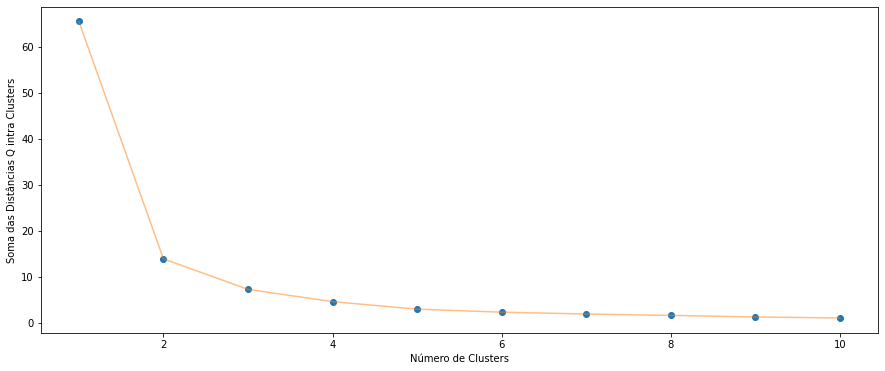

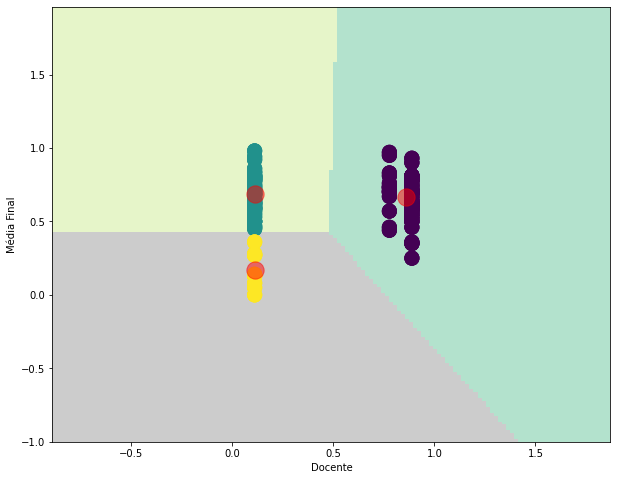

In [68]:
X2 = dfkm20201[['docente','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'docente' ,y = 'media_final' , data = dfkm20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Docente')
plt.show()

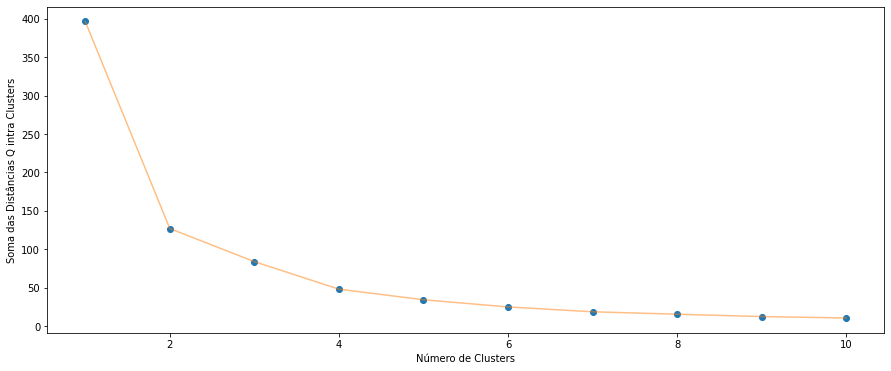

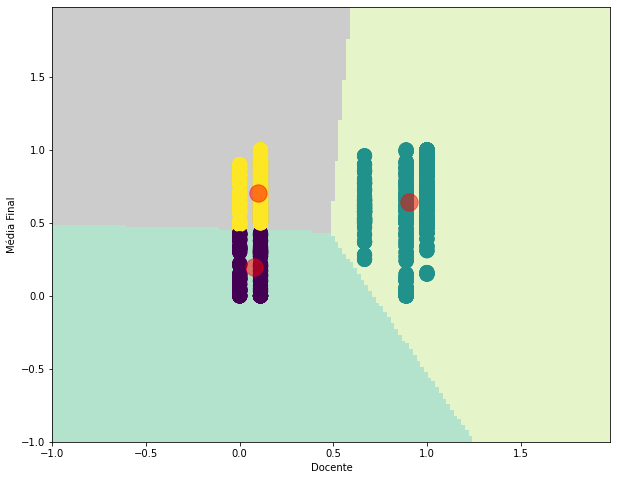

In [69]:
X2 = dfkmnot20201[['docente','media_final']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'docente' ,y = 'media_final' , data = dfkmnot20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Média Final') , plt.xlabel('Docente')
plt.show()

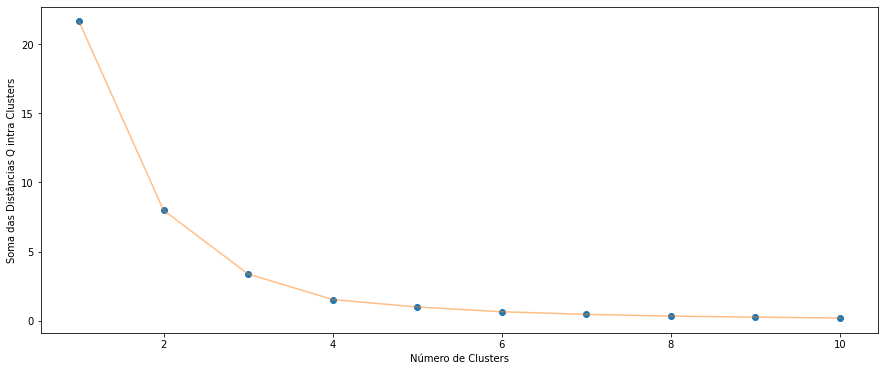

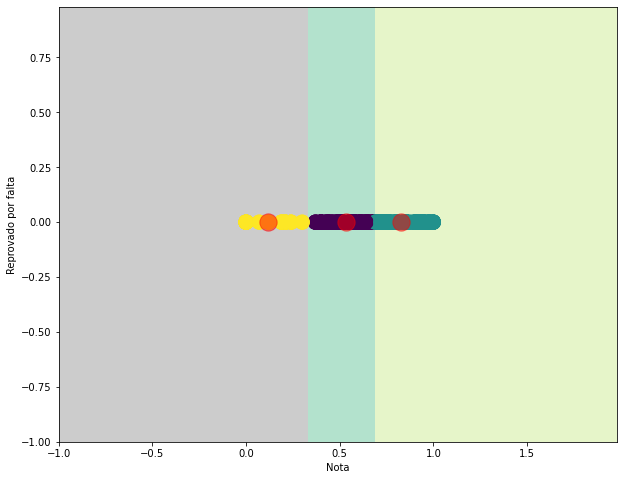

In [70]:
X2 = dfkm20201[['nota','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'nota' ,y = 'reprovadoporfalta' , data = dfkm20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Nota')
plt.show()

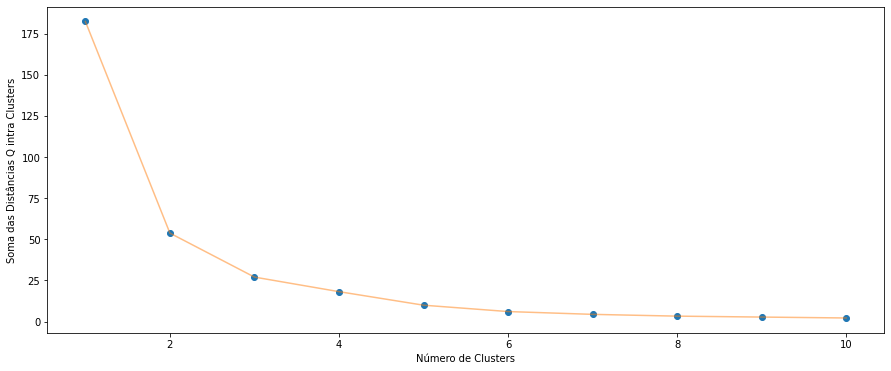

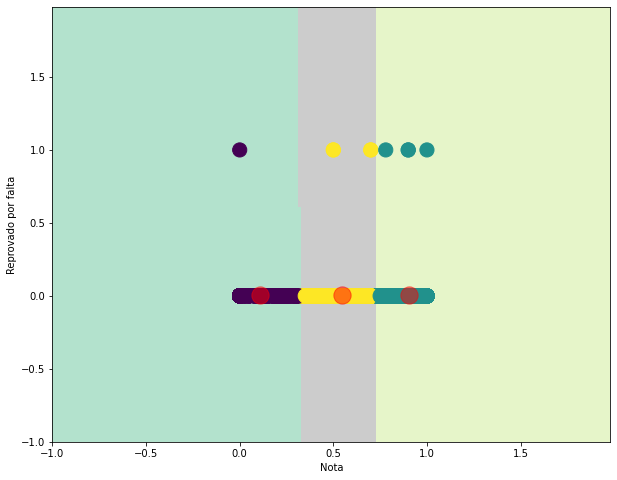

In [71]:
X2 = dfkmnot20201[['nota','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'nota' ,y = 'reprovadoporfalta' , data = dfkmnot20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Nota')
plt.show()

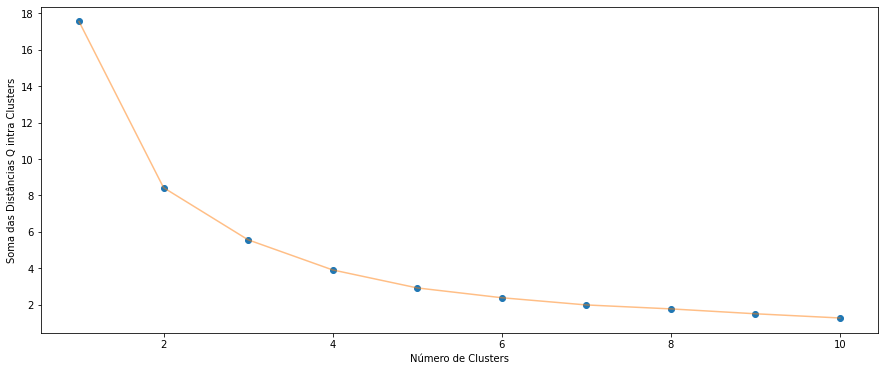

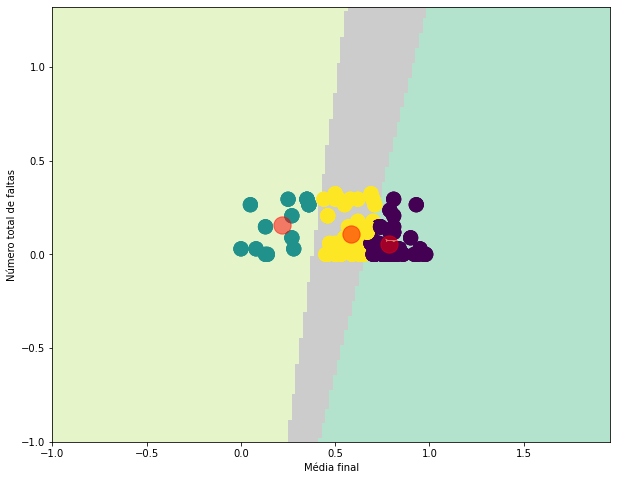

In [72]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkm20201[['media_final', 'numero_total_faltas']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'media_final' ,y = 'numero_total_faltas' , data = dfkm20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Número total de faltas') , plt.xlabel('Média final')
plt.show()

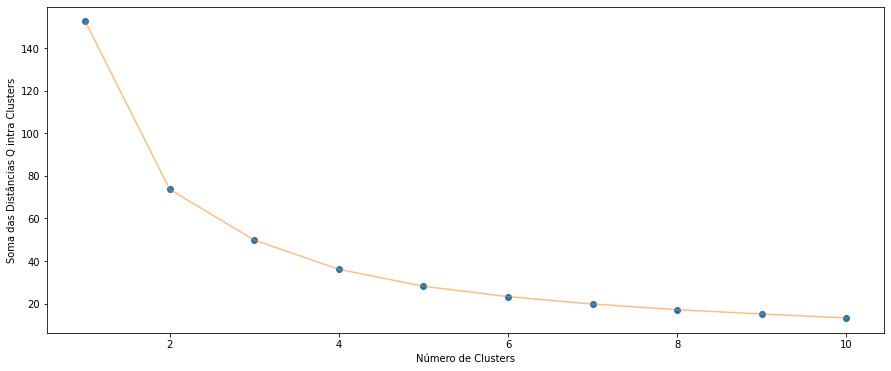

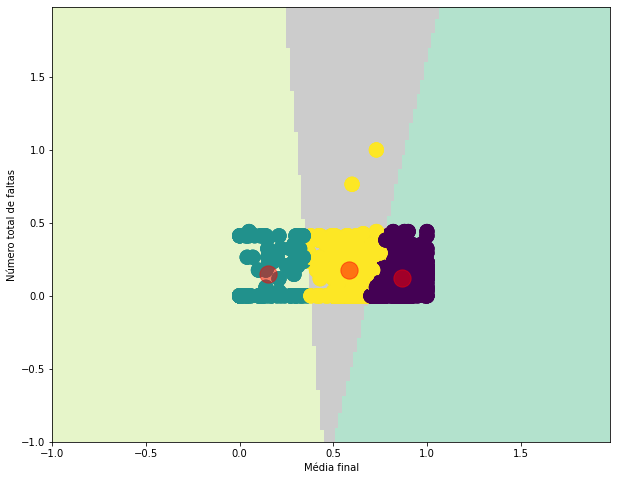

In [73]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkmnot20201[['media_final', 'numero_total_faltas']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (10 , 8) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'media_final' ,y = 'numero_total_faltas' , data = dfkmnot20201 , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Número total de faltas') , plt.xlabel('Média final')
plt.show()

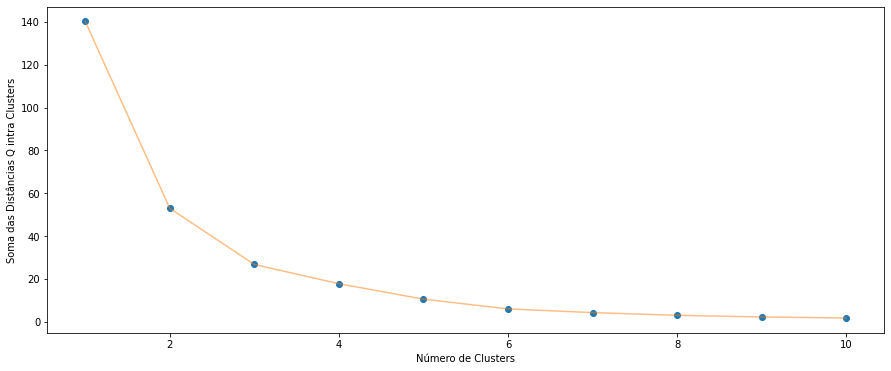

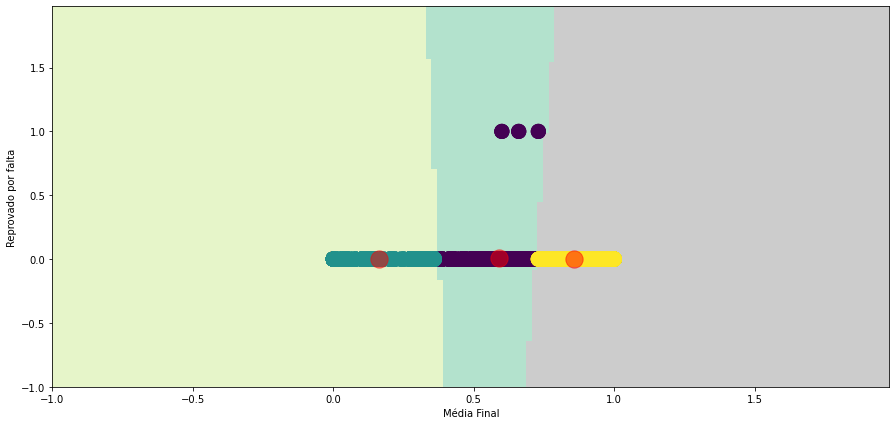

In [74]:
# id_turma	discente	docente	unidade	nota	media_final	numero_total_faltas	aprovado	reposicao	reprovadoporfalta	docente_nome
X2 = dfkm[['media_final','reprovadoporfalta']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

# Inicializando e Computando o KMeans com o valor de 4 clusters:
algorithm = (KMeans(n_clusters = 3))
algorithm.fit(X2)

# Saída:

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10,
       random_state=None, tol=0.0001, verbose=0)

# Visualizando os grupos criados e seus centroides:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')
plt.scatter( x = 'media_final' ,y = 'reprovadoporfalta' , data = dfkm , c = labels2 , s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Reprovado por falta') , plt.xlabel('Média Final')
plt.show()